In [19]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv("./data/reddit_vm.csv")

In [98]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [99]:
df.tail()

,title,score,id,url,comms_num,created,body,timestamp
1419,Comment,1,ejackaa,NaN,0,1.553486e+09,I didn't say thimerosal is mercury. I said thi...,2019-03-25 05:50:41
1420,Comment,2,ejacj98,NaN,0,1.553486e+09,"The ""myth"" you're debunking is in regards to t...",2019-03-25 05:50:20
1421,Comment,2,ejabpdx,NaN,0,1.553485e+09,You'll have to read it again because I didn't ...,2019-03-25 05:40:03
1422,Comment,0,ej9xuaf,NaN,0,1.553475e+09,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21
1423,Comment,1,ej9x2qr,NaN,0,1.553474e+09,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1424 non-null   object 
 1   score      1424 non-null   int64  
 2   id         1424 non-null   object 
 3   url        444 non-null    object 
 4   comms_num  1424 non-null   int64  
 5   created    1424 non-null   float64
 6   body       1059 non-null   object 
 7   timestamp  1424 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 89.1+ KB


In [101]:
df.isna().sum()

title          0
score          0
id             0
url          980
comms_num      0
created        0
body         365
timestamp      0
dtype: int64

In [102]:
import re
import string

## Data Cleaning

Removing any grammatical symbols from the text and converting everything to lower case 

In [103]:
# function to clean
def clean_data(text):
    
    # remove text within brackets
    text = re.sub('\[.*?\]', '', text)
    
    # remove text within parenthesis
    text = re.sub('\(.*?\)', '', text)
    
    # remove numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # remove whitespaces
#     text = re.sub('\s+', ' ', text)
    
    # remove any quotes
    text = re.sub('\"+', '', text)
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # lowercase all text
    text = text.lower()
    
    # remove anything not a-z
#     text = re.sub('[^a-z]', '', text)
        
    return text

In [104]:
df['cleaned_title'] = df['title'].apply(lambda x: clean_data(x))
df.head()

,title,score,id,url,comms_num,created,body,timestamp,cleaned_title
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,health canada approves astrazeneca covid vaccine
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,covid in canada vaccination passports a near c...
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,coronavirus variants could fuel canadas third ...
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,canadian government to extend covid emergency ...
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,canada pfizer is extremely committed to meetin...


In [105]:
len(df)

1424

In [106]:
df_cleaned = df[df['title'] != 'Comment']
len(df_cleaned)

444

In [107]:
df_cleaned.tail()

,title,score,id,url,comms_num,created,body,timestamp,cleaned_title
440,I am a father of five unvaccinated children. A...,1,1v3c8o,http://www.np.reddit.com/r/conspiracy/comments...,1,1.389625e+09,NaN,2014-01-13 16:55:48,i am a father of five unvaccinated children am...
441,Love Them. Protect Them. Never Inject Them.,1,1v3c3i,http://i.imgur.com/SkB0a6T.jpg,2,1.389625e+09,NaN,2014-01-13 16:53:07,love them protect them never inject them
442,Vaccines Are Just Asping For Trouble,2,1v3brt,http://i.imgur.com/bIPQpbv.jpg,1,1.389624e+09,NaN,2014-01-13 16:47:31,vaccines are just asping for trouble
443,Dr. Harper explained in her presentation that ...,1,1v3blj,http://www.feelguide.com/2013/07/16/lead-devel...,1,1.389624e+09,NaN,2014-01-13 16:44:57,dr harper explained in her presentation that t...
444,Polio arose in the US at a period where pestic...,1,1v3bh2,http://www.np.reddit.com/r/medicine/comments/1...,1,1.389624e+09,NaN,2014-01-13 16:42:55,polio arose in the us at a period where pestic...


## EDA


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from matplotlib import cm
import seaborn as sns

#NLP libraries
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [109]:
# nltk.download('vader_lexicon')

In [110]:
sid = SentimentIntensityAnalyzer()

In [111]:
for title in df_cleaned['cleaned_title']:
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

health canada approves astrazeneca covid vaccine
compound: 0.4019, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
covid in canada vaccination passports a near certainty says bioethicist
compound: 0.25, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
coronavirus variants could fuel canadas third wave
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
canadian government to extend covid emergency benefits
compound: 0.1779, 
neg: 0.239, 
neu: 0.367, 
pos: 0.394, 
canada pfizer is extremely committed to meeting vaccine delivery targets
compound: 0.3384, 
neg: 0.0, 
neu: 0.79, 
pos: 0.21, 
canada oxfordastrazeneca vaccine approval expected this week
compound: 0.4767, 
neg: 0.0, 
neu: 0.659, 
pos: 0.341, 
covid músicos que han recibido la vacuna
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
now casting covid vaccine volunteers freezer truck drivers and others
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
beer after corona vaccination
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
waiting for vaccine
compound

neu: 0.903, 
pos: 0.097, 
only vaccinated students affected by whooping cough outbreak in massachusetts
compound: -0.1531, 
neg: 0.151, 
neu: 0.849, 
pos: 0.0, 
there have been more than  cases of polio in pakistan since january many people here think the polio vaccination campaign is a western conspiracy to sterilise their children  its an idea the taliban have been putting about for  years now
compound: -0.5267, 
neg: 0.082, 
neu: 0.918, 
pos: 0.0, 
why i chose to delay vaccines with my first and why i wont do that again
compound: -0.3182, 
neg: 0.15, 
neu: 0.85, 
pos: 0.0, 
mercola is a hero he dares to fight tptb its surprising he hasnt been assassinated yet hes an individual who truly cares about health
compound: 0.8402, 
neg: 0.081, 
neu: 0.559, 
pos: 0.36, 
its now been admitted by a cdc whistleblower that theyve been covering up the data which shows vaccines are causing autism mercola recommends products which are far safer and more likely to be effective than anything that com

pos: 0.15, 
i am a father of five unvaccinated children am i unfit to be a parent or is it your opinion that i am unfit
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
love them protect them never inject them
compound: 0.7783, 
neg: 0.0, 
neu: 0.424, 
pos: 0.576, 
vaccines are just asping for trouble
compound: -0.4019, 
neg: 0.351, 
neu: 0.649, 
pos: 0.0, 
dr harper explained in her presentation that the cervical cancer risk in the us is already extremely low and that vaccinations are unlikely to have any effect upon the rate of cervical cancer in the united states
compound: -0.8883, 
neg: 0.276, 
neu: 0.665, 
pos: 0.058, 
polio arose in the us at a period where pesticide use skyrocketed and was being applied with reckless abandon 
compound: -0.6808, 
neg: 0.259, 
neu: 0.741, 
pos: 0.0, 


In [112]:
def find_sentiment(text):
    polarity_score = sid.polarity_scores(text)['compound']
    
    if polarity_score < 0:
        sentiment = "negative"
    elif polarity_score > 0:
        sentiment = "positive"
    elif polarity_score == 0:
        sentiment = 'neutral'
    return sentiment

In [113]:
# df_cleaned.loc[:,'sentiment'] = df_cleaned['cleaned_title'].apply(lambda x: find_sentiment(x))
# df_cleaned.loc[:,'compound_score'] = df_cleaned['cleaned_title'].apply(lambda x: sid.polarity_scores(x)['compound'])

df_cleaned['sentiment'] = df_cleaned['cleaned_title'].apply(lambda x: find_sentiment(x))

df_cleaned['compound_score'] = df_cleaned['cleaned_title'].apply(lambda x: sid.polarity_scores(x)['compound'])



<ipython-input-113-6570b2f4d91f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df_cleaned['cleaned_title'].apply(lambda x: find_sentiment(x))
<ipython-input-113-6570b2f4d91f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['compound_score'] = df_cleaned['cleaned_title'].apply(lambda x: sid.polarity_scores(x)['compound'])


In [114]:
df_cleaned

,title,score,id,url,comms_num,created,body,timestamp,cleaned_title,sentiment,compound_score
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,health canada approves astrazeneca covid vaccine,positive,0.4019
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,covid in canada vaccination passports a near c...,positive,0.2500
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,coronavirus variants could fuel canadas third ...,neutral,0.0000
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,canadian government to extend covid emergency ...,positive,0.1779
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,canada pfizer is extremely committed to meetin...,positive,0.3384
...,...,...,...,...,...,...,...,...,...,...,...
440,I am a father of five unvaccinated children. A...,1,1v3c8o,http://www.np.reddit.com/r/conspiracy/comments...,1,1.389625e+09,NaN,2014-01-13 16:55:48,i am a father of five unvaccinated children am...,neutral,0.0000
441,Love Them. Protect Them. Never Inject Them.,1,1v3c3i,http://i.imgur.com/SkB0a6T.jpg,2,1.389625e+09,NaN,2014-01-13 16:53:07,love them protect them never inject them,positive,0.7783
442,Vaccines Are Just Asping For Trouble,2,1v3brt,http://i.imgur.com/bIPQpbv.jpg,1,1.389624e+09,NaN,2014-01-13 16:47:31,vaccines are just asping for trouble,negative,-0.4019
443,Dr. Harper explained in her presentation that ...,1,1v3blj,http://www.feelguide.com/2013/07/16/lead-devel...,1,1.389624e+09,NaN,2014-01-13 16:44:57,dr harper explained in her presentation that t...,negative,-0.8883


In [115]:
df_cleaned.head()

,title,score,id,url,comms_num,created,body,timestamp,cleaned_title,sentiment,compound_score
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,health canada approves astrazeneca covid vaccine,positive,0.4019
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,covid in canada vaccination passports a near c...,positive,0.2500
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,coronavirus variants could fuel canadas third ...,neutral,0.0000
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,canadian government to extend covid emergency ...,positive,0.1779
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,canada pfizer is extremely committed to meetin...,positive,0.3384


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

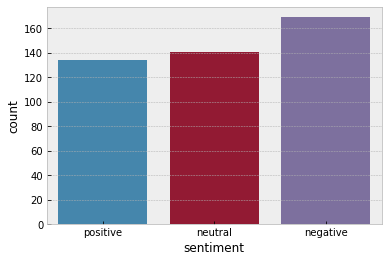

In [116]:
sns.countplot(df_cleaned['sentiment'])

### TOKENIZE

In [56]:
stop_words = set(stopwords.words('english'))
#tokenize and remove any stop words
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token for token in token if token not in stop_words]
    return stopwords_removed

In [12]:
# function to tokenize
def tokenize(text):
    joined_text= ' '.join(text)
    tokenized_text = word_tokenize(joined_text)
    return tokenized_text
                                  

In [13]:
tokenized_title = tokenize(cleaned_title)
tokenized_title[:10]

['health',
 'canada',
 'approves',
 'astrazeneca',
 'covid19',
 'vaccine',
 'covid19',
 'in',
 'canada',
 'vaccination']

### Vectorization

Converting the text into a vector where each element in the vector represents a different word.
The vector is the length of the entire vocabulary -- here, every word that appears in our corpus.

In [15]:
# function to return a count vectorized representation of text as a dictionary
def count_vectorize(text, vocab=None):
# vocab is an optional parameter set to default to None
# vocab is just in case we use a vocabulary that contains words not seen in the song

    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(text))
    
    # empty dictionary with keys as the unique words in the corpus
    text_dict = {i:0 for i in unique_words}
    
    # adding count values for each unique words
    for t in text:
        text_dict[t] +=1
    
    return text_dict
    

In [17]:
vectorized_title = count_vectorize(tokenized_title)
print(vectorized_title)

{'advocating': 1, 'refutes': 1, 'er': 1, 'antivaxxing': 2, 'merck': 1, 'th': 1, 'present': 2, 'sids': 2, 'an': 26, 'woo': 2, 'evidence': 6, 'perfectly': 1, 'deem': 1, 'refuse': 2, 'course': 3, 'allow': 1, 'thinking': 2, 'reasoned': 1, 'she': 4, 'guilt': 1, 'damaging': 1, '12': 1, 'body': 6, 'acellular': 1, 'news': 3, 'pathetic': 1, 'slow': 1, 'while': 1, 'fraud': 1, '4': 2, '3': 2, 'consider': 1, 'recently': 1, 'back': 4, 'led': 1, 'spreads': 1, 'vote': 1, 'individuals': 2, 'honestly': 1, 'lid': 1, 'play': 1, 'better': 4, 'without': 1, 'those': 6, 'frantically': 1, '$': 1, 'kills': 2, 'fascist': 1, 'resource': 1, 'police': 2, 'vaxx': 1, 'question': 4, 'proof': 8, 'safe': 3, 'circulating': 1, 'aunt': 1, 'families': 3, 'ironically': 1, 'americans': 2, 'manufacturers': 1, 'oxfordastrazeneca': 1, 'always': 1, 'academic': 1, 'bothered': 1, 'hisher': 1, 'control': 3, 'turned': 1, 'feed': 1, '”': 3, 'alters': 1, 'deadly': 2, 'populace': 1, 'scientifically': 2, 'written': 1, 'ekg': 1, 'that': 

### TF-IDF Vectorization
TF-IDF is a more advanced form of vectorization that weighs each term in a document by how unique it is to the given document it is contained in. This allows us to summarize the contents of a document using a few KEY WORDS.

If the word is used often in many other documents, it is not unique and therefore probably not too useful if we wanted to figure out how this document is unique in relation to other documents.

Conversely, if a word is used many times in a document, but rarely in all the other documents we are looking into, then it is likely a good indicator for telling us that this word is important to the document in question

In [ ]:
# Function to calculate the TF